# Fredkin spin chain simulation

## Running simulation

In [1]:
push!(LOAD_PATH, ".")

3-element Array{Any,1}:
 "/Applications/Julia-0.6.app/Contents/Resources/julia/local/share/julia/site/v0.6"
 "/Applications/Julia-0.6.app/Contents/Resources/julia/share/julia/site/v0.6"      
 "."                                                                               

In [2]:
addprocs(8)

8-element Array{Int64,1}:
 2
 3
 4
 5
 6
 7
 8
 9

In [3]:
@everywhere using FredkinChain


Use "abstract type ApproxFit end" instead.

Use "abstract type LeastSquares<:ApproxFit end" instead.

Use "LinearFit{T}(...) where T" instead.

Use "LogFit{T}(...) where T" instead.

Use "PowerFit{T}(...) where T" instead.

Use "ExpFit{T}(...) where T" instead.

Use "abstract type ApproxFit end" instead.

Use "abstract type LeastSquares<:ApproxFit end" instead.

Use "abstract type ApproxFit end" instead.

Use "abstract type LeastSquares<:ApproxFit end" instead.

Use "abstract type ApproxFit end" instead.

Use "abstract type LeastSquares<:ApproxFit end" instead.

Use "abstract type ApproxFit end" instead.

Use "abstract type LeastSquares<:ApproxFit end" instead.

Use "abstract type ApproxFit end" instead.

Use "abstract type LeastSquares<:ApproxFit end" instead.

Use "abstract type ApproxFit end" instead.

Use "abstract type LeastSquares<:ApproxFit end" instead.

Use "abstract type ApproxFit end" instead.

Use "abstract type LeastSquares<:ApproxFit end" instead.

Use "abstract type App


Use "ExpFit{T}(...) where T" instead.

Use "PowerFit{T}(...) where T" instead.

Use "ExpFit{T}(...) where T" instead.

Use "ExpFit{T}(...) where T" instead.

Use "ExpFit{T}(...) where T" instead.

Use "ExpFit{T}(...) where T" instead.

Use "ExpFit{T}(...) where T" instead.

Use "PowerFit{T}(...) where T" instead.

Use "ExpFit{T}(...) where T" instead.


In [4]:
?find_power_spectra

search: find_power_spectra



```
find_power_spectra(N_sim::Int, size_exp::Int, time_steps::Int; init::Symbol=:dyck_init, update::Symbol=:open_update, coupling::Bool=false, ncores::Int=8)
```

Finds the average power spectra over `N_sim` simulations run on `ncores` cores, for a chain of length `2^(size_exp)`.

`init` describes the initialization method, which can be `:rand_init` for random configurations or `:dyck_init` for configurations drawn uniformly from the Dyck paths.

`update` describes the update method, which can be `:open_update` or `:periodic_update` for open or periodic boundary conditions respectively.

`coupling` determines whether or not updates on parallel simulations are in the same (randomly chosen) direction.


In [13]:
  = find_power_spectra(80, 8, 2^20, init=:dyck_init, update=:open_update, coupling=true);

	From worker 5:	running simulation: 1
	From worker 4:	running simulation: 1
	From worker 7:	running simulation: 1
	From worker 6:	running simulation: 1
	From worker 3:	running simulation: 1
	From worker 2:	running simulation: 1
	From worker 9:	running simulation: 1
	From worker 8:	running simulation: 1
	From worker 5:	running simulation: 2
	From worker 2:	running simulation: 2
	From worker 6:	running simulation: 2
	From worker 3:	running simulation: 2
	From worker 8:	running simulation: 2
	From worker 4:	running simulation: 2
	From worker 9:	running simulation: 2
	From worker 7:	running simulation: 2
	From worker 5:	running simulation: 3
	From worker 2:	running simulation: 3
	From worker 6:	running simulation: 3
	From worker 8:	running simulation: 3
	From worker 3:	running simulation: 3
	From worker 4:	running simulation: 3
	From worker 9:	running simulation: 3
	From worker 7:	running simulation: 3
	From worker 5:	running simulation: 4
	From worker 2:	running simulation: 4
	From worker

In [42]:
using JLD

@save "open_spectra_random.jld" open_spectra_random

## Data fitting

In [27]:
using JLD

@load "open_spectra_dyck.jld"

1-element Array{Symbol,1}:
 :open_spectra_dyck

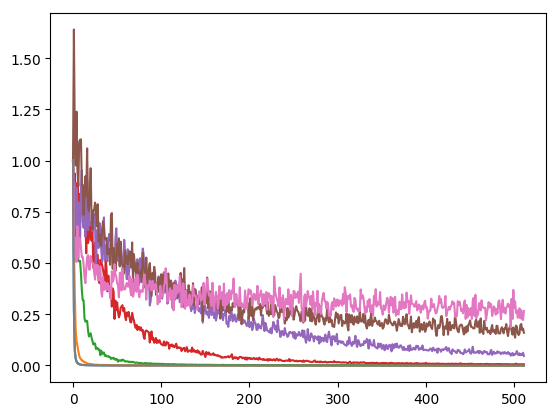

In [7]:
using PyPlot
pygui(false)

for power_spec in open_spectra_random[1:8]
    plot(power_spec[1:512]/power_spec[1])
end

In [11]:
x = [linspace(0, 511, 512);]

#decay_times_dyck = [lorentzian_time(x, open_spectra_dyck[p][1:512]) for p in 1:7]
decay_times_random = [lorentzian_time(x, open_spectra_random[p][1:512]) for p in 1:7]

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] maxabs(::Array{Float64,1}) at ./deprecated.jl:57
 [3] nonlinear_fit(::Array{Float64,2}, ::CurveFit.##7#8{Int64,Int64,CurveFit.RationalPoly{Float64}}, ::Array{Float64,1}, ::Float64, ::Int64) at /Applications/JuliaPro-0.6.0.1.app/Contents/Resources/pkgs-0.6.0.1/v0.6/CurveFit/src/nonlinfit.jl:78
 [4] rational_fit(::Array{Float64,1}, ::Array{Float64,1}, ::Int64, ::Int64, ::Float64, ::Int64) at /Applications/JuliaPro-0.6.0.1.app/Contents/Resources/pkgs-0.6.0.1/v0.6/CurveFit/src/rationalfit.jl:85
 [5] lorentzian_time(::Array{Float64,1}, ::Array{Float64,1}) at /Users/austen/Code/fredkin_chain/FredkinChain.jl:55
 [6] collect(::Base.Generator{UnitRange{Int64},##7#8}) at ./array.jl:441
 [7] include_string(::String, ::String) at ./loading.jl:515
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Applications/JuliaPro-0.6.0.1.app/Contents/Resources/pkgs-0.6.0.1/v0.6/IJulia/src/execute_request.jl:160
 [9] eventloop(::ZMQ.Sock

7-element Array{Float64,1}:
 1.66971   
 0.717307  
 0.11265   
 0.0265682 
 0.00962793
 0.0193077 
 0.0216354 

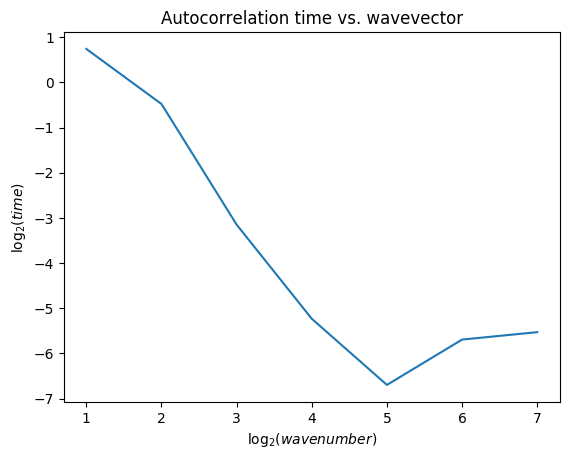

PyObject Text(0.5,1,u'Autocorrelation time vs. wavevector')

In [12]:
#plot(1:7,log2.(decay_times_dyck))
plot(1:7,log2.(decay_times_random))
xlabel(L"$\log_2(wavenumber)$")
ylabel(L"$\log_2(time)$")
title("Autocorrelation time vs. wavevector")

In [16]:
using CurveFit

In [20]:
curve_fit(LinearFit, linspace(1,9, 9), log2.(decay_times))

CurveFit.LinearFit{Float64}([5.49235, -1.54074])

In [57]:
~true

false